In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

In [2]:
num_data = 1000
num_epoch = 10000

x = init.uniform_(torch.Tensor(num_data,1), -15, 15)
noise = init.normal_(torch.FloatTensor(num_data,1), std=3)

y1 = x**4+x**2
y1_noise = (x+noise)**4+(x+noise)**2

y2 = x**2+x
y2_noise = (x+noise)**2+(x+noise)

1. y1

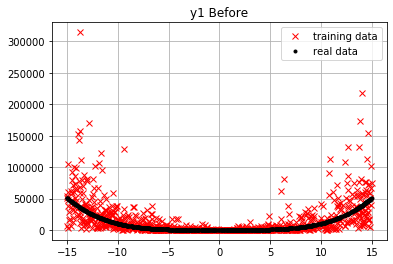

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x.data, y1_noise.data, 'rx')
plt.plot(x.data, y1.data, 'k.')
plt.legend(['training data', 'real data'])
plt.title('y1 Before')
plt.grid(True)
plt.show()

In [4]:
model1 = nn.Sequential(nn.Linear(in_features=1,out_features=3),
                       nn.ReLU(),
                       nn.Linear(in_features=3,out_features=5),
                       nn.ReLU(),
                       nn.Linear(in_features=5,out_features=8),
                       nn.ReLU(),
                       nn.Linear(in_features=8,out_features=3),
                       nn.ReLU(),
                       nn.Linear(in_features=3,out_features=1))
#레이어를 과제와 다르게 시도해봄

In [5]:
loss_func = nn.MSELoss()
#손실함수로 L2 loss fuction, 즉 MSE를 사용하므로

optimizer = optim.Adam(model1.parameters(), lr=0.0005)
#Adam을 사용해봄
#learning rate가 0.005일 때 학습이 덜 되어 0.0005로 설정함

In [6]:
loss_array1 = []

for i in range(num_epoch):
    optimizer.zero_grad()
    output = model1(x)
    
    loss = loss_func(output, y1_noise)
    loss.backward()
    
    optimizer.step()
    
    loss_array1.append(loss.data)

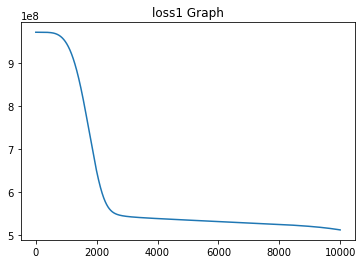

In [7]:
plt.plot(loss_array1)
plt.title('loss1 Graph')
plt.show()

In [8]:
#모델검증
num_data = 1000

test_x = init.uniform_(torch.Tensor(num_data,1), -15, 15)
test_y1 = model1(test_x)

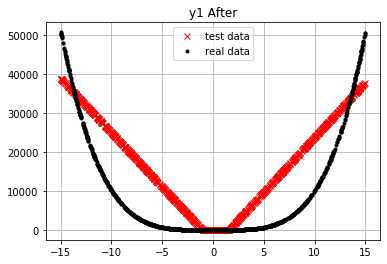

In [9]:
plt.plot(test_x.data, test_y1.data, 'rx')
plt.plot(x.data, y1.data, 'k.')
plt.legend(['test data', 'real data'])
plt.title('y1 After')
plt.grid(True)
plt.show()

#결과 그래프를 봤을 때 학습이 이루어지기는 하지만 그다지 효과적인 학습이 이루어졌다고 보기는 어려운 듯

2. y2

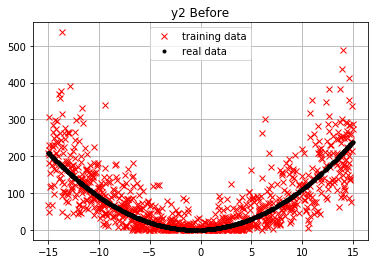

In [10]:
plt.plot(x.data, y2_noise.data, 'rx')
plt.plot(x.data, y2.data, 'k.')
plt.legend(['training data', 'real data'])
plt.title('y2 Before')
plt.grid(True)
plt.show()

In [11]:
model2 = nn.Sequential(nn.Linear(in_features=1,out_features=3),
                       nn.ReLU(),
                       nn.Linear(in_features=3,out_features=5),
                       nn.ReLU(),
                       nn.Linear(in_features=5,out_features=8),
                       nn.ReLU(),
                       nn.Linear(in_features=8,out_features=3),
                       nn.ReLU(),
                       nn.Linear(in_features=3,out_features=1))
#model1과 model2는 동일함

In [12]:
loss_func = nn.MSELoss()
optimizer2 = optim.Adam(model2.parameters(), lr=0.0005)
#loss function과 optimizer는 y1일 때와 동일함

In [13]:
loss_array2 = []

for i in range(num_epoch):
    optimizer2.zero_grad()
    output = model2(x)
    
    loss = loss_func(output, y2_noise)
    loss.backward()
    
    optimizer2.step()
    
    loss_array2.append(loss.data)

<function matplotlib.pyplot.show(*args, **kw)>

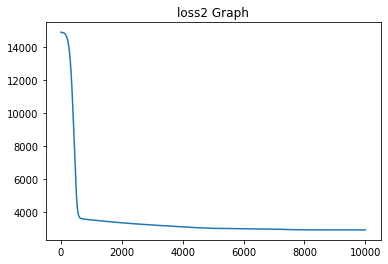

In [14]:
plt.plot(loss_array2)
plt.title('loss2 Graph')
plt.show

In [15]:
#모델검증
num_data = 1000

test_x = init.uniform_(torch.Tensor(num_data,1), -15, 15)
test_y2 = model2(test_x)

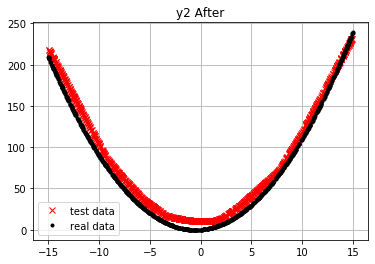

In [16]:
plt.plot(test_x.data, test_y2.data, 'rx')
plt.plot(x.data, y2.data, 'k.')
plt.legend(['test data', 'real data'])
plt.title('y2 After')
plt.grid(True)
plt.show()